# GARCH Model

In [1]:
pip install pandas numpy statsmodels arch matplotlib

   ---------------------------------------- 0.0/926.2 kB ? eta -:--:--
   ---------------------------------------- 926.2/926.2 kB 6.1 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


## Data Preprocessing

In [1]:
import pandas as pd
import numpy as np

# Load Reliance.csv
data = pd.read_csv('RELIANCE.csv', parse_dates=['Date'], index_col='Date')
# Use closing prices and compute returns for volatility
prices = data['Close']
returns = prices.pct_change().dropna()

In [13]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

## Model Specification

In [3]:
from arch import arch_model

# Specify GARCH(1,1) on returns
model_garch = arch_model(returns * 100, vol='Garch', p=1, q=1, dist='Normal')


## Fit and Forecast

In [5]:
# Fit the model
result_garch = model_garch.fit(update_freq=5)
print(result_garch.summary())

# Forecast one-day-ahead volatility
garch_forecast = result_garch.forecast(horizon=1)
# Extract conditional variance and convert back to volatility
cond_var = garch_forecast.variance.iloc[-1, 0]
cond_vol = np.sqrt(cond_var) / 100  # back to original scale
print('Next-day GARCH Volatility:', cond_vol)

Iteration:      5,   Func. Count:     35,   Neg. LLF: 13864.63860295458
Optimization terminated successfully    (Exit mode 0)
            Current function value: 11853.943355780342
            Iterations: 9
            Function evaluations: 57
            Gradient evaluations: 9
                     Constant Mean - GARCH Model Results                      
Dep. Variable:                  Close   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -11853.9
Distribution:                  Normal   AIC:                           23715.9
Method:            Maximum Likelihood   BIC:                           23742.2
                                        No. Observations:                 5305
Date:                Thu, Jun 19 2025   Df Residuals:                     5304
Time:                        14:53:49   Df Model:                            1
         

## Visualization

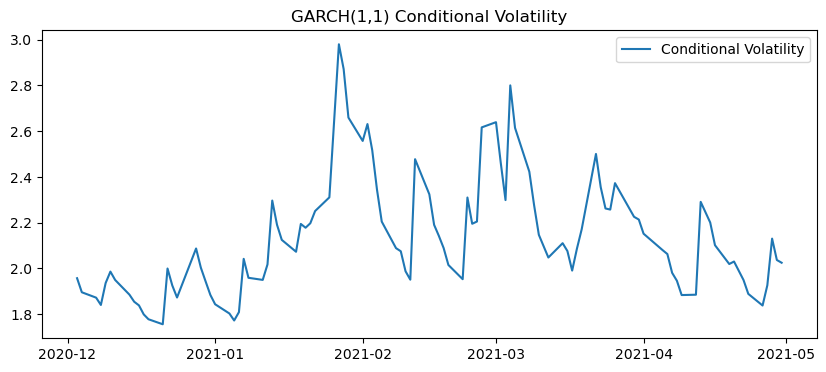

In [7]:
import matplotlib.pyplot as plt

# Plot conditional volatility
plt.figure(figsize=(10, 4))
plt.plot(result_garch.conditional_volatility[-100:], label='Conditional Volatility')
plt.title('GARCH(1,1) Conditional Volatility')
plt.legend()
plt.show()


## Metrics

In [17]:
# 2. Fit GARCH(1,1) model
garch = arch_model(returns, vol='Garch', p=1, q=1, dist='Normal')
res = garch.fit(update_freq=0, disp='off')

# 3. Obtain in-sample conditional volatility forecasts
#    This returns a DataFrame with a 'h.1' column for one-step-ahead forecasts
vol_forecast = res.conditional_volatility.shift(1).dropna()

# 4. Compute realized volatility proxy (e.g., rolling std of returns)
realized_vol = returns.rolling(window=5).std().dropna()

# 5. Align series for metric calculation
common_index = vol_forecast.index.intersection(realized_vol.index)
y_pred = vol_forecast.loc[common_index]
y_true = realized_vol.loc[common_index]

# 6. Calculate and print accuracy metrics
mae = mean_absolute_error(y_true, y_pred)
rmse = np.sqrt(mean_squared_error(y_true, y_pred))

print(f"GARCH(1,1) Volatility Forecast MAE: {mae:.4f}")
print(f"GARCH(1,1) Volatility Forecast RMSE: {rmse:.4f}")

GARCH(1,1) Volatility Forecast MAE: 0.0078
GARCH(1,1) Volatility Forecast RMSE: 0.0122


C:\Users\hiadi\anaconda3\Lib\site-packages\arch\univariate\base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0005775. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
